# Image Classification using Convolutional Neural Network (CNN)

## About The Project

To classify handwritten digits on images, Deep Learning was utilised by creating a Convolutional Neural Network (CNN) using TensorFlow. The CNN model was structured using a series of different layers:

- Convolutional layer to isolate useful features from the images
- Pooling layer to facilitate dimensionality reduction and extraction of dominant features.
- Dropout layer for regularization to reduce overfitting
- Flatten layer to convert the feature maps into a single 1D vector

An accuracy of 98.8% was achieved when the predictions were submitted to Kaggle. 

## Setup

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Activation, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
%matplotlib inline

## Load and Explore Data

In [2]:
data = pd.read_csv("train.csv")
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


In [4]:
print(f"Given dataset has a shape of {data.shape}.")

Given dataset has a shape of (42000, 785).


The given dataset has 42000 images, where information of each image is stored in each row of the data. The "label" column indicates the digit shown on the image. The remaining 784 columns contain values representing the lightness or darkness of the 784 pixels making up each image of size 28 pixels by 28 pixels. A value of 0 represents bright while the max value of 255 represents dark. 

Let's extract samples from the dataset to visualise the images.

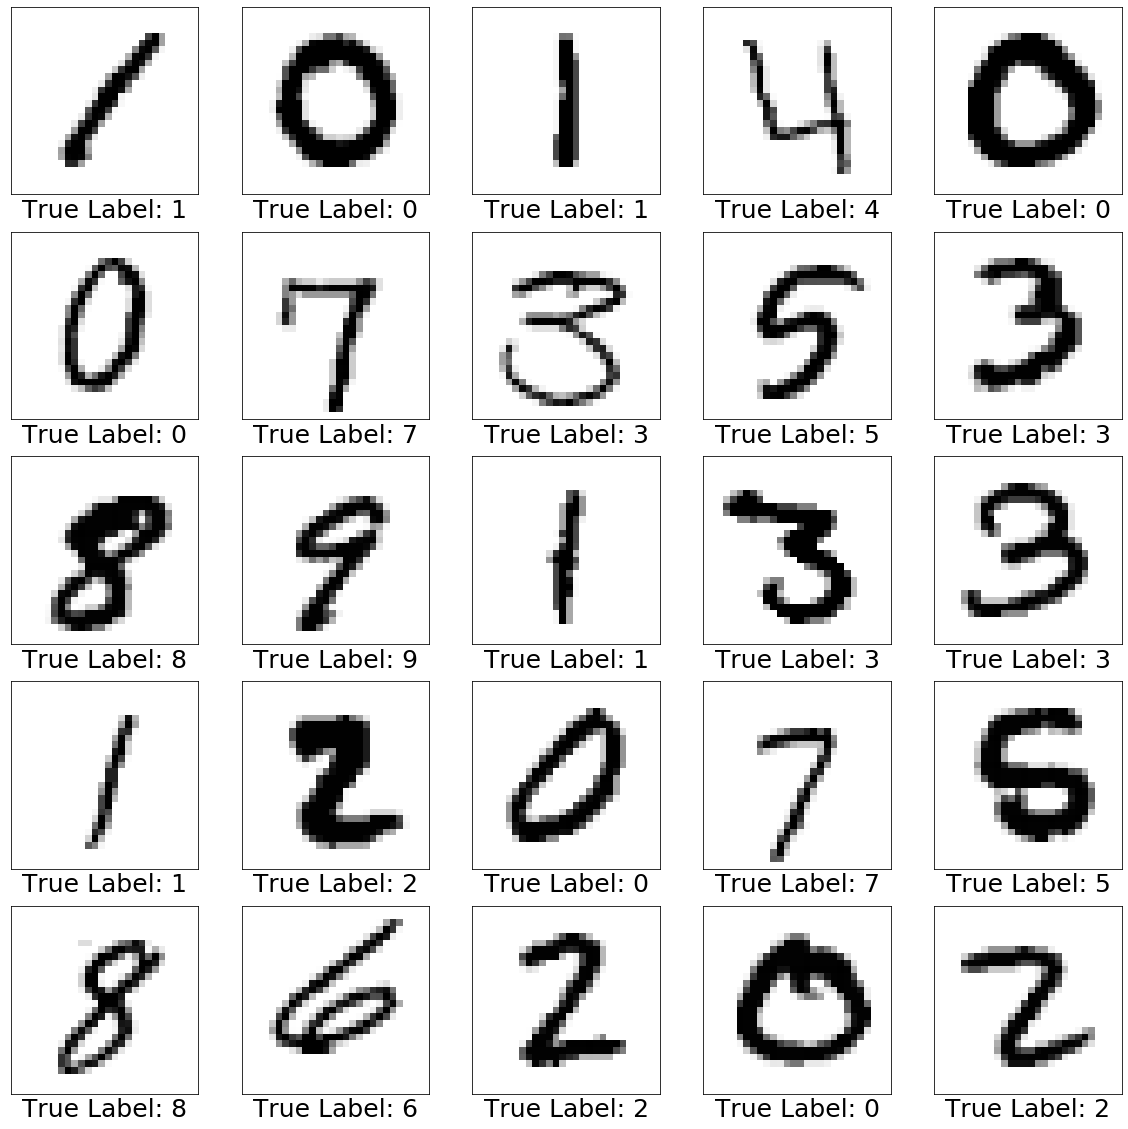

In [5]:
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(data.iloc[i,1:].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xlabel(f'True Label: {data.iloc[i,0]}', fontsize=25)
plt.show()

From the images above, the variation in writing the same digit can be seen. To further illustrate this, let's take a look at the various images representing the digit '6' in the given data.

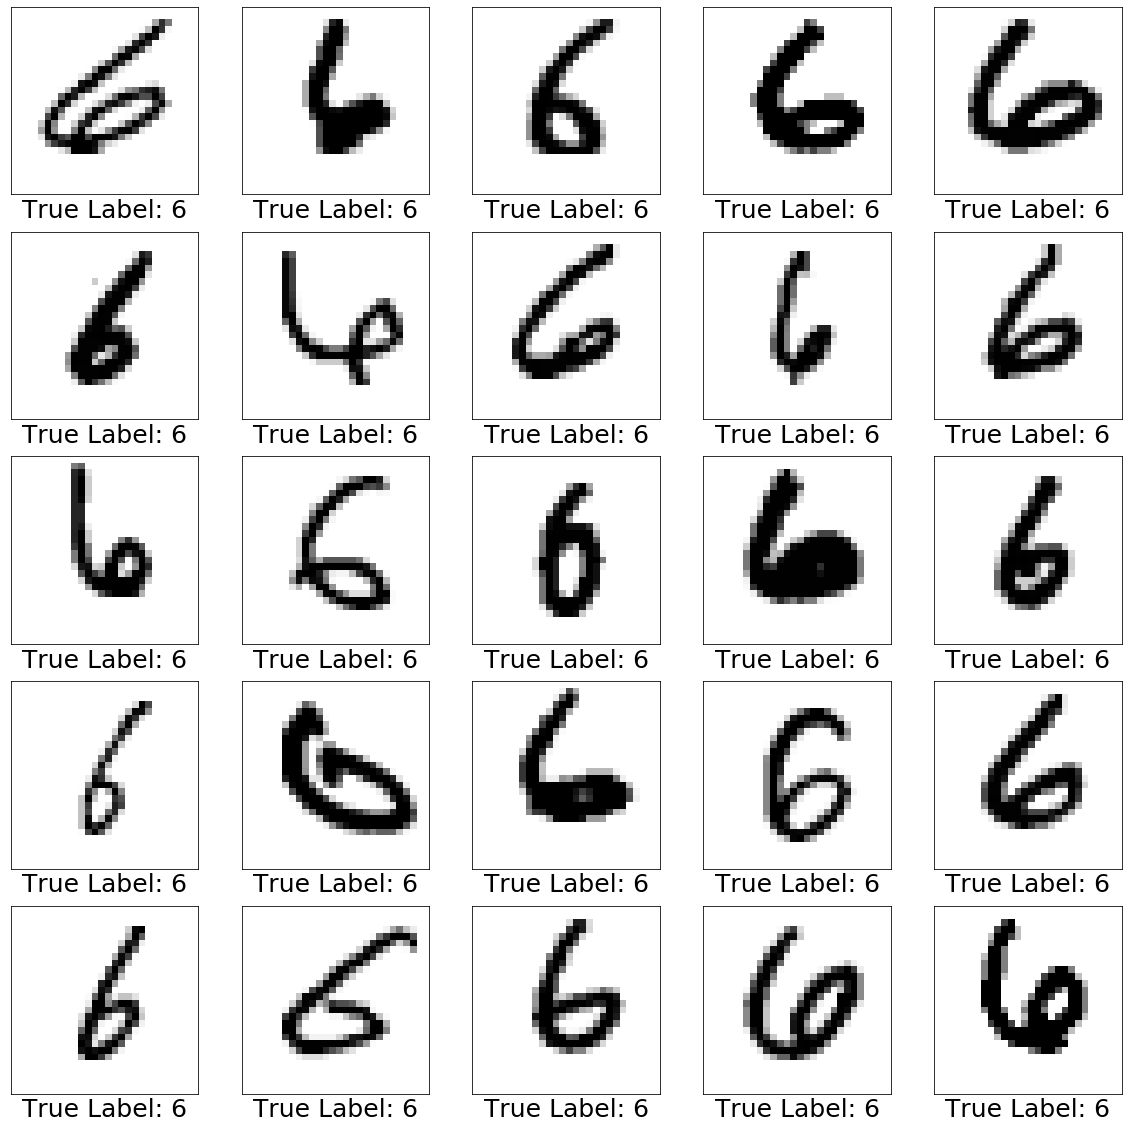

In [6]:
six = data[data["label"]==6]
plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(six.iloc[i,1:].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xlabel(f'True Label: {six.iloc[i,0]}', fontsize=25)
plt.show()

As seen above, some of the images are not so clearly written and it is not immediately obvious that it is "6".

Now, let's take a look at the distribution of the digits in the data first.

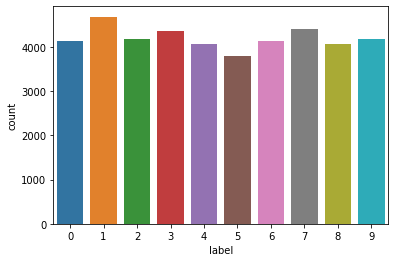

In [7]:
sns.countplot(data.label)

As seen above, there is generally rather balanced distribution of images representing the 10 digits.

## Developing Convolutional Neural Network (CNN) Model

Split the provided data into train and validation images. 

In [8]:
train, val = train_test_split(data, random_state=0)
print(f"Training dataset has a shape of {train.shape} and validation dataset has a shape of {val.shape}")

Training dataset has a shape of (31500, 785) and validation dataset has a shape of (10500, 785)


In [9]:
X_train = train.drop('label', axis=1)
X_val = val.drop('label', axis=1)
y_train = train.label
y_val = val.label

Normalising the data:

In [10]:
X_train = X_train/255
X_val = X_val/255

Reshape the data to form images of size 28px by 28px.

In [11]:
X_train = X_train.values.reshape(-1,28,28,1)
print(X_train.shape)

(31500, 28, 28, 1)


In [12]:
X_val = X_val.values.reshape(-1,28,28,1)
print(X_val.shape)

(10500, 28, 28, 1)


In [13]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

In [14]:
X_train = np.asarray(X_train)
X_val = np.asarray(X_val)
y_train = np.asarray(y_train)
y_val = np.asarray(y_val)

A Convolutional Neural Network (CNN) is structured to reduce the images into a form which is easier to process while retaining important features to obtain good prediction: 
- Convolutional layer (Conv2D) can isolate useful features from the images
- Pooling layer (MaxPooling2D) facilitates dimensionality reduction and extraction of dominant features. 
- Dropout layer is for regularization to reduce overfitting
- Flatten layer converts the feature maps into a single 1D vector

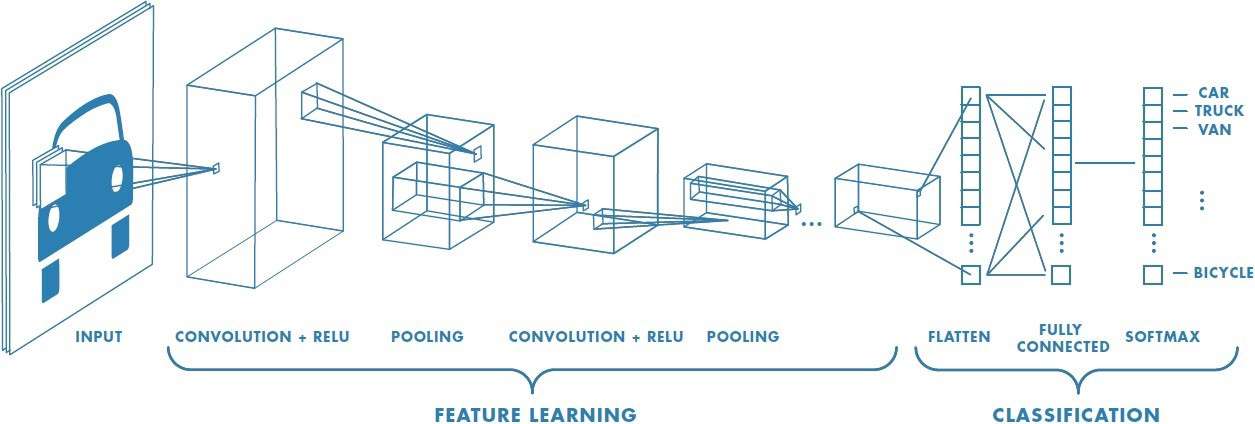

In [15]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),
    Dropout(0.25),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0

In [17]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_val, y_val), callbacks=[EarlyStopping(patience=1)])

Epoch 1/5
985/985 [==============================] - 18s 17ms/step - loss: 0.6924 - accuracy: 0.7690 - val_loss: 0.0928 - val_accuracy: 0.9705
Epoch 2/5
985/985 [==============================] - 16s 16ms/step - loss: 0.1412 - accuracy: 0.9559 - val_loss: 0.0624 - val_accuracy: 0.9798
Epoch 3/5
985/985 [==============================] - 14s 15ms/step - loss: 0.1015 - accuracy: 0.9683 - val_loss: 0.0461 - val_accuracy: 0.9857
Epoch 4/5
985/985 [==============================] - 15s 15ms/step - loss: 0.0811 - accuracy: 0.9750 - val_loss: 0.0500 - val_accuracy: 0.9817


The developed CNN model was able to achieve an accuracy of 98.17%. 

## Evaluating Model

Let's examine the incorrect predictions made by the model. 

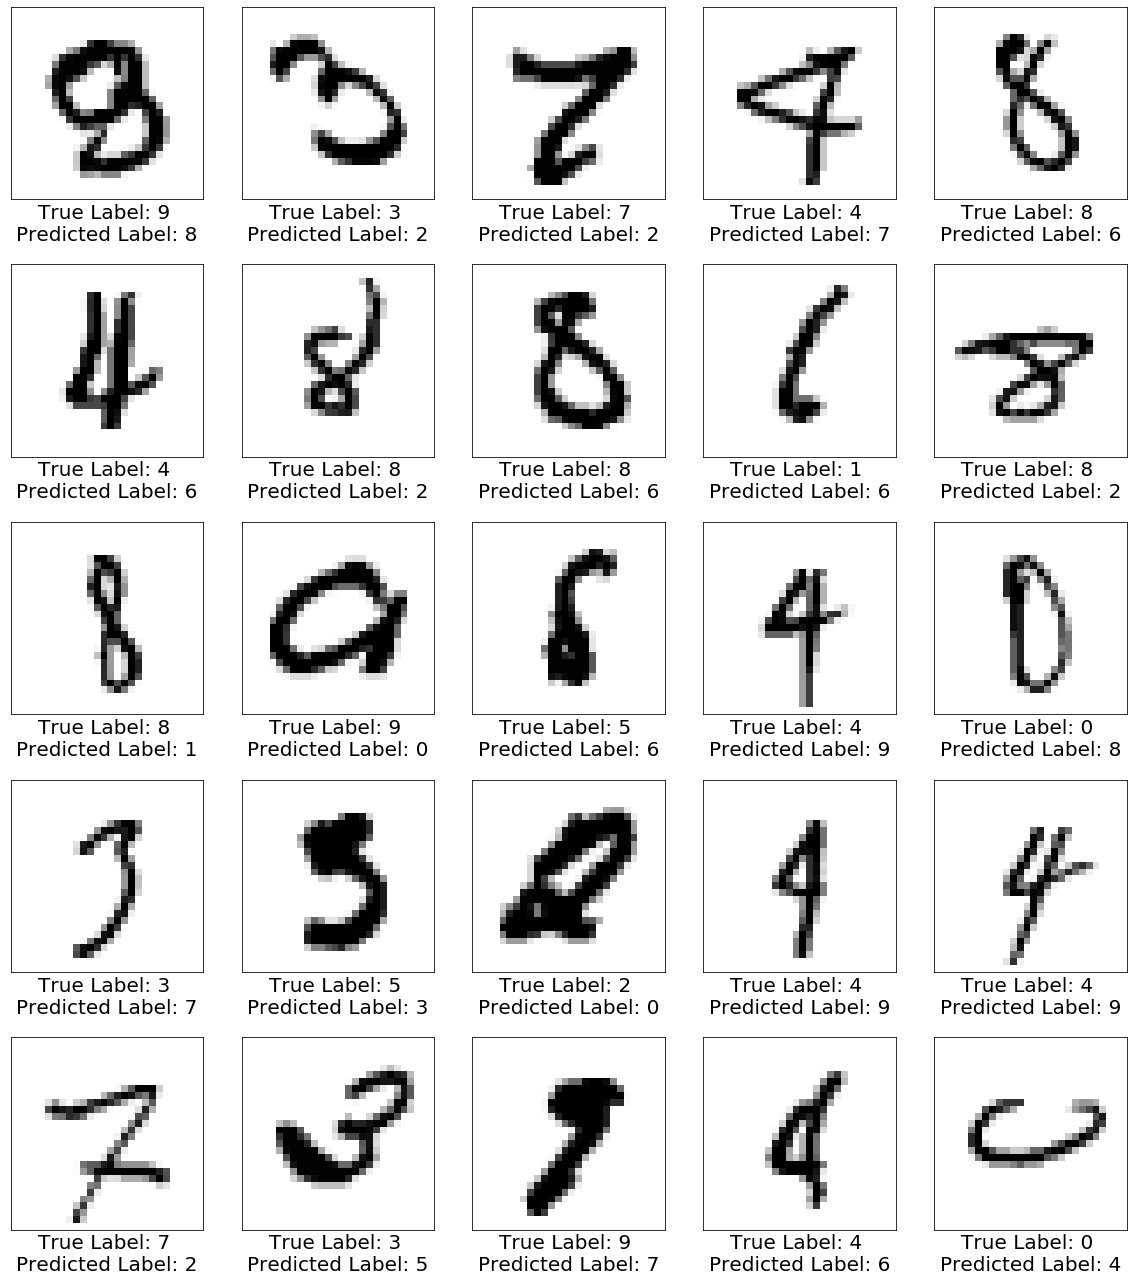

In [19]:
wrong = val.copy(deep=True)
wrong["predicted"] = np.argmax(model.predict(X_val), axis=-1)
wrong = wrong[wrong["predicted"]!=wrong["label"]]

plt.figure(figsize=(20,20))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.subplots_adjust(top = 0.99)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(wrong.iloc[i,1:-1].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xlabel(f'True Label: {wrong.iloc[i,0]} \nPredicted Label: {wrong.iloc[i,-1]}', fontsize=20)
plt.show()

As seen above, it is indeed difficult even for a human to correctly recognise some of the digits shown. As shown below, the model had the most errors with images representing the digit "4" in the validation set.

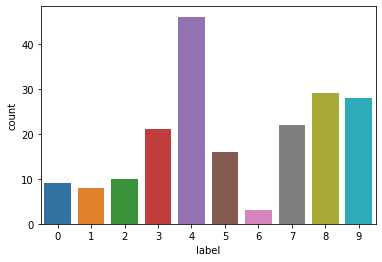

In [20]:
sns.countplot(wrong['label'])

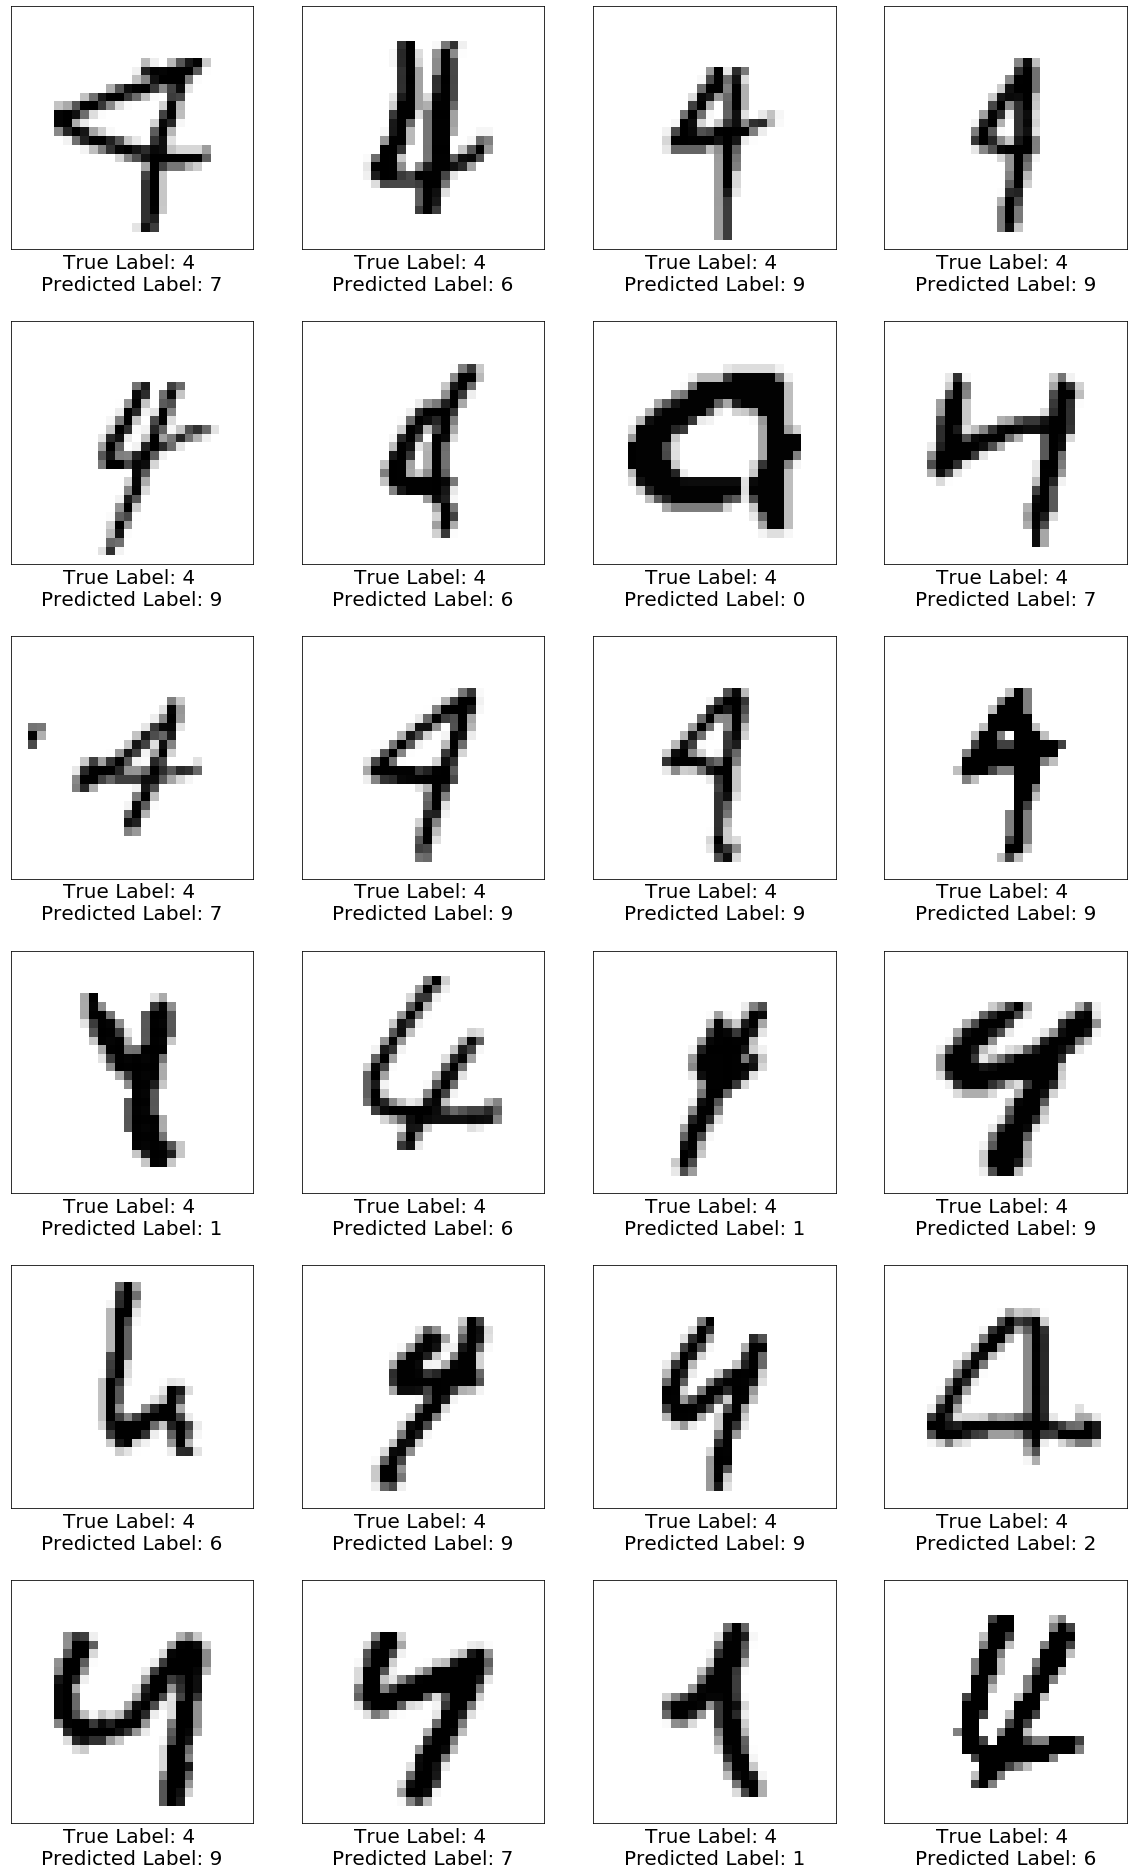

In [23]:
four = wrong[wrong["label"]==4]
plt.figure(figsize=(20,20))
for i in range(24):
    plt.subplot(6,4,i+1)
    plt.subplots_adjust(top = 1.4)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(four.iloc[i,1:-1].to_numpy().reshape(28,28),cmap=plt.cm.gray_r,interpolation='nearest')
    plt.xlabel(f'True Label: {four.iloc[i,0]} \nPredicted Label: {four.iloc[i,-1]}', fontsize=20)
plt.show()

## Testing the CNN Model

In [25]:
test = pd.read_csv("test.csv")
test = test/255
test = test.values.reshape(-1, 28, 28, 1)
prediction = np.argmax(model.predict(test), axis=-1)

submission = pd.DataFrame({
    'ImageId': pd.Series(range(1,28001)),
    'Label': prediction
})
submission.to_csv('submission.csv', index=False)

The predictions from the above model were submitted to Kaggle and achieved 98.8% accuracy. 

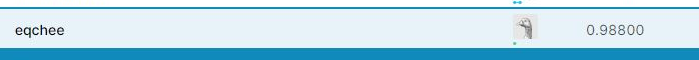